In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/crime_inegi.csv", index_col = ["nom_mun", "date"], parse_dates = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2114 entries, (Monterrey, 2015-10-12 00:00:00) to (nan, 2015-01-27 00:00:00)
Data columns (total 12 columns):
year            2114 non-null int64
lat             2114 non-null float64
lon             2114 non-null float64
news            2114 non-null object
cassualties     2114 non-null float64
url             2114 non-null object
neighborhood    1860 non-null object
point           2114 non-null object
clave_mun       1917 non-null float64
clave_loc       1917 non-null float64
nom_loc         1917 non-null object
ageb            1917 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 213.8+ KB


In [4]:
df = df[["cassualties"]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2114 entries, (Monterrey, 2015-10-12 00:00:00) to (nan, 2015-01-27 00:00:00)
Data columns (total 1 columns):
cassualties    2114 non-null float64
dtypes: float64(1)
memory usage: 32.1+ KB


In [6]:
df.head()

cassualties
nom_mun        date                   
Monterrey      2015-10-12          1.0
               2015-10-02          1.0
Santa Catarina 2015-10-01          1.0
Monterrey      2015-09-24          1.0
               2015-09-24          2.0

#### Primero por semestre

In [7]:
level_values = df.index.get_level_values
df_agg = df.groupby([level_values(0)] + [pd.Grouper(freq='2Q', closed='left', level=-1)]).sum()

In [8]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 193 entries, (Apodaca, 2011-06-30 00:00:00) to (Santiago, 2017-12-31 00:00:00)
Data columns (total 1 columns):
cassualties    193 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [10]:
df_mun = df_agg.unstack(level = 1)

In [11]:
df_mun.head()

cassualties                                              \
date               2011-06-30 2011-12-31 2012-06-30 2012-12-31 2013-06-30   
nom_mun                                                                     
Apodaca                  39.0       33.0       46.0       29.0       25.0   
Cadereyta Jiménez        37.0       21.0       48.0        7.0        4.0   
Ciénega de Flores         2.0        6.0        NaN        1.0        NaN   
Doctor González           NaN        NaN        NaN        NaN        NaN   
El Carmen                 1.0        4.0        1.0        3.0        1.0   

                                                                          \
date              2013-12-31 2014-06-30 2014-12-31 2015-06-30 2015-12-31   
nom_mun                                                                    
Apodaca                 22.0       10.0        4.0        6.0        3.0   
Cadereyta Jiménez        9.0        6.0        3.0       11.0        3.0   
Ciénega de Flores        NaN        2.0        NaN        NaN        NaN   
Doctor González          1.0        NaN        2.0        NaN        NaN   
El Carmen                NaN        1.0        NaN        NaN        NaN   

                                                                          
date              2016-06-30 2016-12-31 2017-06-30 2017-12-31 2018-06-30  
nom_mun                                                                   
Apodaca                 12.0        NaN        6.0        7.0        3.0  
Cadereyta Jiménez        NaN        NaN        6.0        4.0        1.0  
Ciénega de Flores        2.0        NaN        1.0        NaN        NaN  
Doctor González          NaN        NaN        NaN        NaN        NaN  
El Carmen                NaN        NaN        NaN        NaN        NaN

In [12]:
df_mun = df_mun.fillna(0)

In [25]:
corr_mun = df_mun.T.corr(method="pearson")

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

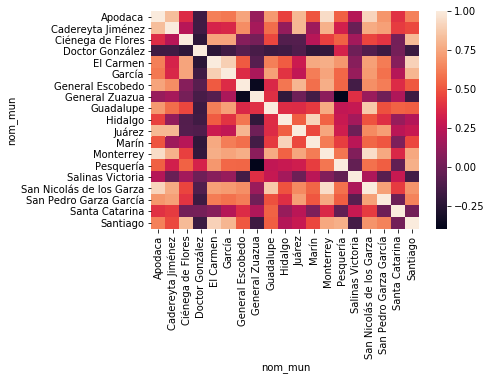

In [29]:
heat_map = sns.heatmap(corr_mun)
plt.show()

### Pero eso no era lo que queríamos ja